In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import datetime as datetime
import nltk
import seaborn
import csv
from bs4 import BeautifulSoup
from sklearn import datasets, linear_model
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from sklearn.model_selection import train_test_split 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')
from subprocess import check_output
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# extract News_title and News_abstract 
news = pd.read_csv('WSJ_news.csv')
#news = pd.read_csv('WSJ_news.csv')
news_title = news['News_title']
news_abs = news['News_abstract']
sid = SentimentIntensityAnalyzer()

In [3]:
#calculate sentiment score of News_title
date = news['Date']
news_scores_title = []
n = 508
for i in range(n):
    message_text = news_title[i]
    scores = sid.polarity_scores(message_text)
    a = [[date[i],scores['compound']]]
    news_scores_title.extend(a)

title_score1 = pd.DataFrame(news_scores_title,columns = ['Attributes','title_score1'])
title_score1

,Attributes,title_score1
0,2016-09-26,0.9508
1,2016-09-27,0.9881
2,2016-09-28,-0.9888
3,2016-09-29,0.9911
4,2016-09-30,-0.8984
5,2016-10-03,-0.9835
6,2016-10-04,0.9782
7,2016-10-05,-0.7556
8,2016-10-06,-0.9891
9,2016-10-07,0.8677


In [4]:
#calculate sentiment score of News_abstract
news_scores_abs = []
n = 508
for i in range(n):
    message_text = news_abs[i]
    scores = sid.polarity_scores(message_text)
    a = [[date[i],scores['compound']]]
    news_scores_abs.extend(a)

abs_score1 = pd.DataFrame(news_scores_abs,columns = ['Attributes','abs_score1'])
abs_score1

,Attributes,abs_score1
0,2016-09-26,0.9990
1,2016-09-27,0.9976
2,2016-09-28,0.9942
3,2016-09-29,0.9987
4,2016-09-30,0.9958
5,2016-10-03,0.9949
6,2016-10-04,-0.6473
7,2016-10-05,0.9986
8,2016-10-06,0.9768
9,2016-10-07,0.9935


In [5]:
# combine sentiment_scores with stock price data
MarketData = pd.read_csv('LabeledY.csv')
df_combine = pd.merge(MarketData, title_score1,on='Attributes')
df_combine = pd.merge(df_combine, abs_score1,on='Attributes')
df_combine

,Unnamed: 0,Attributes,High,Low,Open,Close,Volume,Adj Close,Daily Growth,LabledY1,LabledY2,title_score1,abs_score1
0,2,2016-09-26,2158.540039,2145.040039,2158.540039,2146.100098,3216170000,2146.100098,-0.005763,-1,-1,0.9508,0.9990
1,3,2016-09-27,2161.129883,2141.550049,2146.040039,2159.929932,3437770000,2159.929932,0.006472,1,1,0.9881,0.9976
2,4,2016-09-28,2172.399902,2151.790039,2161.850098,2171.370117,3891460000,2171.370117,0.004404,0,1,-0.9888,0.9942
3,5,2016-09-29,2172.669922,2145.199951,2168.899902,2151.129883,4249220000,2151.129883,-0.008193,-1,-1,0.9911,0.9987
4,6,2016-09-30,2175.300049,2156.510010,2156.510010,2168.270020,4173340000,2168.270020,0.005453,0,1,-0.8984,0.9958
5,7,2016-10-03,2164.409912,2154.770020,2164.330078,2161.199951,3137550000,2161.199951,-0.001446,0,0,-0.9835,0.9949
6,8,2016-10-04,2165.459961,2144.010010,2163.370117,2150.489990,3750890000,2150.489990,-0.005954,-1,-1,0.9782,-0.6473
7,9,2016-10-05,2163.949951,2155.149902,2155.149902,2159.729980,3906550000,2159.729980,0.002125,0,0,-0.7556,0.9986
8,10,2016-10-06,2162.929932,2150.280029,2158.219971,2160.770020,3461550000,2160.770020,0.001182,0,0,-0.9891,0.9768
9,11,2016-10-07,2165.860107,2144.850098,2164.189941,2153.739990,3619890000,2153.739990,-0.004829,0,-1,0.8677,0.9935


In [6]:
df_combine.to_csv('df_combine.csv')

### descrption statistics of sentiment indicator

In [7]:
df_combine['title_score1'].describe()

count    508.000000
mean      -0.037688
std        0.897794
min       -0.998000
25%       -0.966050
50%       -0.442700
75%        0.965775
max        0.999500
Name: title_score1, dtype: float64

In [8]:
df_combine['abs_score1'].describe()

count    508.000000
mean       0.675960
std        0.691189
min       -0.998600
25%        0.959975
50%        0.996500
75%        0.998900
max        0.999900
Name: abs_score1, dtype: float64

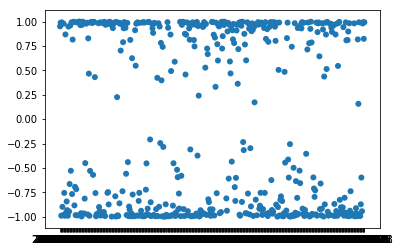

In [9]:
plt.scatter(df_combine['Attributes'],df_combine['title_score1'],edgecolors='none')
plt.show()

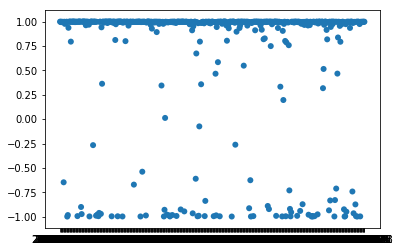

In [10]:
plt.scatter(df_combine['Attributes'],df_combine['abs_score1'],edgecolors='none')
plt.show()

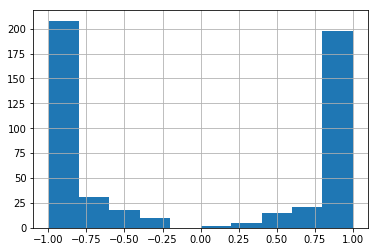

In [11]:
df_combine['title_score1'].hist()

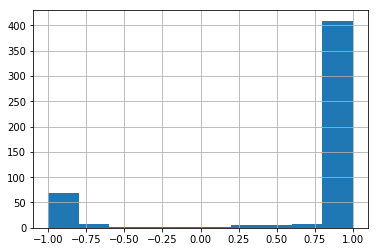

In [12]:
df_combine['abs_score1'].hist()